<a href="https://colab.research.google.com/github/LakshmiP1/DS/blob/main/dbscan_and_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("Wholesale customers data.csv");

print(df.head())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [3]:
df


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


In [6]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB
None


In [8]:
array=df.values

In [9]:
array

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]])

In [10]:
stscaler=StandardScaler().fit(array)
x=stscaler.transform(array)

In [11]:
x

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [15]:
dbscan=DBSCAN(eps=3,min_samples=6)
dbscan.fit(x)

DBSCAN(eps=3, min_samples=6)

In [17]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [18]:
c1=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [19]:
c1

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
435,0
436,0
437,0
438,0


In [20]:
clustered=pd.concat([df,c1],axis=1)

In [21]:
clustered

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,0


In [22]:
clustered[clustered['cluster']==-1]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
23,26373,36423,22019,5154,4337,16523,-1
47,44466,54259,55571,7782,24171,6465,-1
61,35942,38369,59598,3254,26701,2017,-1
71,18291,1266,21042,5373,4173,14472,-1
85,16117,46197,92780,1026,40827,2944,-1
86,22925,73498,32114,987,20070,903,-1
87,43265,5025,8117,6312,1579,14351,-1
93,11314,3090,2062,35009,71,2698,-1
181,112151,29627,18148,16745,4948,8550,-1
183,36847,43950,20170,36534,239,47943,-1


In [34]:
clustered

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
5,9413,8259,5126,666,1795,1451,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,0


clustered

In [30]:
clustered

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
5,9413,8259,5126,666,1795,1451,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,0


In [35]:
clustered.drop(['cluster'],inplace=True,axis=1)

In [36]:
clustered

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [37]:
 #Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(clustered)

In [38]:
scaled_Univ_df

array([[-0.37740493,  0.92498369,  0.32501675, -0.30071419,  0.19343229,
         0.40043266],
       [-0.43889095,  0.72726653,  0.06538934, -0.10407894,  0.25334686,
         5.28440034],
       [ 0.16479003, -0.7747524 , -0.41183452,  1.11885166, -0.55509678,
         0.41009113],
       ...,
       [ 0.27536007,  2.04538089,  3.17416581, -0.70591126,  3.29609334,
         0.47367608],
       [-0.09504083, -0.61985423, -0.68593161, -0.52211999, -0.64617767,
         0.68133324],
       [-0.75033863, -0.6756965 , -0.64762141, -0.81967224, -0.56315703,
        -0.98716791]])

In [40]:
from sklearn.cluster import KMeans

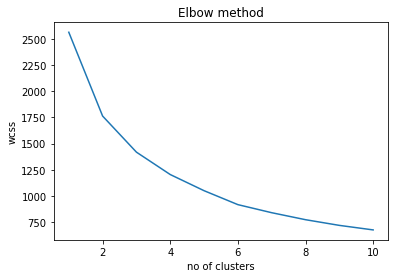

In [43]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(scaled_Univ_df)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("no of clusters")
plt.ylabel("wcss")
plt.show()

In [53]:
clusters_new=KMeans(5,random_state=42)
clusters_new.fit(scaled_Univ_df)

KMeans(n_clusters=5, random_state=42)

In [54]:
clusters_new.labels_

array([0, 1, 3, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 0, 2, 0, 1, 1, 2, 2, 2, 3,
       1, 2, 2, 2, 4, 2, 1, 2, 2, 3, 2, 0, 1, 0, 0, 3, 1, 1, 0, 4, 0, 4,
       4, 0, 4, 2, 2, 2, 0, 2, 2, 4, 0, 2, 0, 2, 0, 0, 2, 4, 2, 0, 1, 2,
       3, 3, 3, 0, 2, 2, 4, 2, 2, 2, 0, 0, 2, 2, 3, 1, 2, 3, 4, 0, 2, 0,
       2, 2, 2, 1, 0, 0, 3, 2, 2, 0, 0, 0, 0, 2, 0, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 3, 3, 3, 1, 2, 3, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1,
       1, 3, 3, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 0, 2, 0, 0, 0, 2, 2,
       4, 0, 4, 1, 2, 2, 2, 0, 4, 0, 0, 2, 0, 3, 1, 2, 2, 1, 0, 2, 2, 2,
       0, 0, 0, 3, 2, 2, 0, 2, 3, 3, 0, 2, 2, 4, 4, 1, 2, 2, 4, 2, 0, 2,
       4, 2, 4, 2, 0, 0, 0, 4, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 3,
       0, 2, 2, 1, 2, 2, 2, 2, 3, 3, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 4, 3,
       0, 1, 2, 2, 2, 3, 3, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 0, 3, 2,
       2, 3, 3, 2, 0, 2, 0, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 4, 0, 0, 4, 0, 4, 2, 2, 4, 3, 2,

In [55]:
clustered['clusterid_new']=clusters_new.labels_

In [56]:
clustered

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusterid_new
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,3
4,22615,5410,7198,3915,1777,5185,1
5,9413,8259,5126,666,1795,1451,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,3
436,39228,1431,764,4510,93,2346,3
437,14531,15488,30243,437,14841,1867,4
438,10290,1981,2232,1038,168,2125,2


In [57]:
clustered.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
,,mean,mean,mean,mean,mean,mean
0,0,6040.129032,7675.688172,12134.978495,1212.602151,4874.924731,1113.247312
1,1,15594.589744,7732.205128,7514.051282,2646.128205,1924.769231,3746.974359
2,2,10293.137441,2162.725118,2889.938389,1930.402844,667.611374,721.924171
3,3,25642.480769,3784.673077,4410.557692,9449.538462,584.923077,1550.326923
4,4,5728.343750,16209.375000,25554.031250,1799.937500,12468.031250,1978.375000


In [58]:
clustered[clustered['clusterid_new']==1]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusterid_new
2,6353,8808,7684,2405,3516,7844,1
4,22615,5410,7198,3915,1777,5185,1
7,7579,4956,9426,1669,3321,2566,1
12,31714,12319,11757,287,3881,2931,1
17,5876,6157,2933,839,370,4478,1
18,18601,6327,10099,2205,2767,3181,1
24,22647,9776,13792,2915,4482,5778,1
30,18815,3610,11107,1148,2134,2963,1
36,29955,4362,5428,1729,862,4626,1
40,24025,4332,4757,9510,1145,5864,1


In [59]:
clustered[clustered['clusterid_new']==2]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusterid_new
6,12126,3199,6975,480,3140,545,2
8,5963,3648,6192,425,1716,750,2
11,13146,1124,4523,1420,549,497,2
15,10253,1114,3821,397,964,412,2
19,7780,2495,9464,669,2518,501,2
...,...,...,...,...,...,...,...
432,21117,1162,4754,269,1328,395,2
433,1982,3218,1493,1541,356,1449,2
434,16731,3922,7994,688,2371,838,2
438,10290,1981,2232,1038,168,2125,2


In [60]:
clustered[clustered['clusterid_new']==3]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusterid_new
3,13265,1196,4221,6404,507,1788,3
22,31276,1917,4469,9408,2381,4334,3
33,29729,4786,7326,6130,361,1083,3
39,56159,555,902,10002,212,2916,3
70,16705,2037,3202,10643,116,1365,3
72,4420,5139,2661,8872,1321,181,3
73,19899,5332,8713,8132,764,648,3
88,7864,542,4042,9735,165,46,3
91,12754,2762,2530,8693,627,1117,3
103,56082,3504,8906,18028,1480,2498,3


In [61]:
clustered[clustered['clusterid_new']==4]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusterid_new
28,4113,20484,25957,1158,8604,5206,4
43,630,11095,23998,787,9529,72,4
45,5181,22044,21531,1740,7353,4985,4
46,3103,14069,21955,1668,6792,1452,4
49,4967,21412,28921,1798,13583,1163,4
56,4098,29892,26866,2616,17740,1340,4
65,85,20959,45828,36,24231,1423,4
77,12205,12697,28540,869,12034,1009,4
92,9198,27472,32034,3232,18906,5130,4
145,22039,8384,34792,42,12591,4430,4
